

<img src="../images/cads-logo.png" style="height: 100px;" align=left> <img src="../images/statsmodels-logo.jpg" style="height: 100px;" align=right>


# Regression Modelling & Model Evaluation

## Content

- [Regression Nuts and Bolts](#Regression-Nuts-and-Bolts)
    - [Understanding regression output for prediction](#Understanding-regression-output-for-prediction)
    - [Fitted values and residuals](#Fitted-values-and-residuals)
- [Model Evaluation](#Model-Evaluation)
- [Evaluation Metrics](#Evaluation-Metrics)
    - [1. Mean squared errors](#1.-Mean-squared-errors)
    - [2. R-squared](#2.-R-squared)
    - [3. Adjusted R-squared](#3.-Adjusted-R-squared)
    - [4. F-test](#4.-F-test)
- [Model selection](#Model-selection)
    - [Resampling or train-test-split Approach](#Resampling-or-train-test-split-Approach)
    - [Probabilistic Statistics Approach](#Probabilistic-Statistics-Approach)
    - [Log-Likelihood](#Log-Likelihood:)
    - [AIC: Akaike Information Criterion](#AIC:-Akaike-Information-Criterion)
    - [BIC: Bayesian Information Criterion](#BIC:-Bayesian-Information-Criterion)
- [Linear Regression Assumptions and diagnostics](#Linear-Regression-Assumptions-and-diagnostics)
- [Model Validation](#Model-Validation)
    - [Skewness and kurtosis](#Skewness-and-kurtosis)
    - [When does it *not* matter?](#When-does-it-*not*-matter?)
    - [When *might* it matter?](#When-*might*-it-matter?)
        - [How to deal with outliers?](#How-to-deal-with-outliers?)
- [Residual diagnostics](#Residual-diagnostics)
    - [Residual plots](#Residual-plots)
        - [Plot the Residuals Against Another Variable](#Plot-the-Residuals-Against-Another-Variable)
        - [Plot the Magnitude of the Residuals Against the Predictor](#Plot-the-Magnitude-of-the-Residuals-Against-the-Predictor)
        - [Plot the Distribution of the Residuals](#Plot-the-Distribution-of-the-Residuals)
        - [QQ plot](#QQ-plot)
- [Solution](#Solution)
- [Reference](#Reference)

In [2]:
import statsmodels.api as sm 
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [3]:
# `sm.datasets.get_rdataset` downloads and returns R datasets
iris = sm.datasets.get_rdataset("iris").data
mtcars = sm.datasets.get_rdataset("mtcars").data
ToothGrowth = sm.datasets.get_rdataset("ToothGrowth").data
anscombe = sns.load_dataset("anscombe")

In [4]:
def lm(formula, data): 
    """
    Specifies and fits linear model with statsmodels
    """
    reg = smf.ols(formula = formula, data = data)
    return reg.fit()

## Regression Nuts and Bolts 

Assume we want to estimate $y$ using the predictors $x_1, x_2, ..., x_n.$
<img src = '../images/dataForm.png'>

**Example:**

Predict the fuel efficiency (mpg) of a car based on its displacement (disp) in mtcars dataset and print the summary of the model.

In [5]:
mpg_disp = lm(formula = "mpg ~ disp", 
         data = mtcars)
mpg_disp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Mon, 15 May 2023   Prob (F-statistic):           9.38e-10
Time:                        12:58:27   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Understanding regression output for prediction 

We use the `.summary()` method to return model statistics in a data frame. 

<img src='../images/LmSumCoef.png'>

Assume $y = \beta_0 + \beta_1 x + \epsilon$ but our model outcome estimated y as $ \hat{y} = \hat{\beta_0} + \hat{\beta_1} x$. Therefore, $\hat{\beta_0}$ and $\hat{\beta_1}$ are **point estimates** of $\beta_0$ and $\beta_1$. The summary of the linear model helps us to find **interval estimates** of $\beta_0$ and $\beta_1$ as well. 

- The `coef` column lists the coefficient estimates: `Intercept` relates to $\beta_0$, etc. 

`std err`, `t` and `P>|t|` are used for statistical inference. 
    As we mentioned before, we can estimate y as  $\hat{y} = \hat \beta_0 + \hat \beta_1 x$, where:

$$\hat{\beta_1} = \frac{{\mathrm{Cov}}(x, y)}{{\mathrm{Var}}(x)} = \frac{\sum_{i=0}^{N-1}{(x_i - \bar{x})\times (y_i - \bar{y})}}{\sum_{i=0}^{N-1}{(x_i - \bar{x})^2}}$$

$$\hat{\beta_0} = \bar{y} - \beta_1 \bar{x}$$
    

- `std err` is the standard deviation of the sampling distribution 

**Extra:**
> $\frac {\hat\beta_1 - \beta_1}{\frac{\sigma}{\sqrt {\sum_{i=0}^{N-1}{(x_i - \bar x)^2}}}} \sim t( N-2 )$

>$\frac {\hat\beta_0 - \beta_0}{\sigma \sqrt{\frac {1}{N} + \frac{{\bar x}^2}{\sum_{i=0}^{N-1}{(x_i - \bar{x})^2}}}} \sim t( N-2 )$ 

 
- `t` here refers to the t-statistic calculated for the coefficient estimates. A general rule of thumb is that a t-statistic more than 2 in absolute value represents a significant coefficient. 
    
- `P>|t|` is the probability that we observe an estimate as extreme as what we've observed given that the null hypothesis is true. 
    
- `[0.025 	0.975]` represent the upper and lower bounds of the 95% confidence interval. 

In [6]:
mpg_disp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Mon, 15 May 2023   Prob (F-statistic):           9.38e-10
Time:                        12:59:37   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Extra:**

In [7]:
print("\n************* t values **************")
print(mpg_disp.tvalues)
print("\n************* CI **************")
print(mpg_disp.conf_int(alpha=0.05))
print("\n************* SE **************")
print(mpg_disp.bse)
print("\n************* Coefficients **************")
print(mpg_disp.params)
print("\n************* t distribution **************")
from scipy.stats import t
tval=t.ppf(1-0.025, len(mtcars)-2)
print(tval)
print("\n************* Manual CI **************")
# mu = x_bar +- t(n-2)*SE
print(mpg_disp.params - tval * mpg_disp.bse)
print(mpg_disp.params + tval * mpg_disp.bse)


************* t values **************
Intercept    24.070411
disp         -8.747152
dtype: float64

************* CI **************
                   0          1
Intercept  27.088432  32.111277
disp       -0.050838  -0.031592

************* SE **************
Intercept    1.229720
disp         0.004712
dtype: float64

************* Coefficients **************
Intercept    29.599855
disp         -0.041215
dtype: float64

************* t distribution **************
2.0422724563012373

************* Manual CI **************
Intercept    27.088432
disp         -0.050838
dtype: float64
Intercept    32.111277
disp         -0.031592
dtype: float64


**Attention:** You should not use the *p-value* or *t-statistic* of the coefficients to select variables to include in your model. The p-value only tells you if a variable is statistically significant given the other variables in your model. 

A variable may not be statistically significant but improve predictive power. 

**Exercise:**

- Fit a model predicting `selling_price` with `area` using the `house_prices` dataset. 
- Interpret the output (specify which elements we want them to interpret.)
- Add `living_space_size` as a predictor. 

In [8]:
house_prices = pd.read_csv("../data/house_prices.csv")

In [9]:
# Your code here

### Fitted values and residuals

- The **fitted value**, accessed using the `.predict()` method, is the prediction from our model - the regression's best guess of what $y$ is based on the $X$ observed. 
- The **residual**, accessed using the `.resid` attribute, is our model's 'mistake' - the difference between our prediction and the actual value of the response variable. 

`predict()` also has an `exog` argument to calculate fitted values for a new set of data. 



In [10]:
price_size.predict()

NameError: name 'price_size' is not defined

In [ ]:
price_size.resid

# Model Evaluation

We want to find a function of inputs which predicts as "good" as possible on new data. How do we measure the quality of the fitted model? 

The figure below shows the summary of the linear model we designed before to estimate `mpg` based on `disp`:

<img src='../images/LmSumMetric.png'>

## Evaluation Metrics

### 1. Mean squared errors 

The mean squared errors metric is appealing in part because it's the **loss function** for linear regression, i.e. how we solve for the optimal weights in linear regression. Recall that OLS minimises squared errors: 

$$\sum^n _{i=1} (y_i - \hat y)^2$$

However, it's in squared units of the response variable, and is not as interpretable. 

To circumvent this, we take the square root of the mean squared error to obtain the **root mean squared error**. The root mean square error is in the same units as your response variable:

In [11]:
mpg_disp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Mon, 15 May 2023   Prob (F-statistic):           9.38e-10
Time:                        13:01:55   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
mpg_disp.df_resid

30.0

In [13]:
# d = the number of degree of freedom. 
# The number of independent ways by which a dynamic system can move, 
# without violating any constraint imposed on it, 
# is called number of degrees of freedom

# n = mpg_disp.nobs
n = len(mtcars)
# num_params = mpg_disp.df_model + 1
num_params = len(mpg_disp.params)
# d = mpg_disp.df_resid
d = n - num_params 

mpg_disp.mse_resid, (np.sum(mpg_disp.resid**2))/mpg_disp.df_resid ,np.sqrt(mpg_disp.mse_resid)

(10.571956309406156, 10.571956309406156, 3.2514544913632353)

### 2. R-squared 
The **R-squared**, also known as the **coefficient of determination** and often denoted $R^2$, is defined as the percentage of variation in $y$ explained by the variation in the predictors. Algebraically, 

$$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$

where: 
- $SST$ Sum of Squares Total, $\sum^N _{i=1}(y_i - \bar y) ^2$
- $SSR$: Sum of Squares due to Regression, $\sum^N _{i=1} (\hat y_i - \bar y)^2$ 
- $SSE$: Sum of Squares Error, $\sum^N _{i=1}(\hat y_i - y_i) ^2$

The R-squared (typically) lies within 0 and 1. An R-squared of 1 implies that the model fits the data perfectly, whereas an R-squared of 0 implies that the regression model does not explain any variation in $y$, or that $\hat y = \bar y$ (the model is just predicting the mean of $y$ for all observations, and the slope coefficients are zero). 

In [14]:
mpg_disp.rsquared

0.7183433404897299

### 3. Adjusted R-squared 

The R-squared necessarily increases for any predictor that's added to the data, even pure noise. The adjusted R-squared adjusts for this, and you should use this in place of the R-squared if comparing models with different numbers of predictors.

> ${R^2}_{Adj.} = 1- \frac {(1 - R^2)(N - 1)}{N - p - 1}$

> $N$ = size of data set <br>
> $p$ = number of predictors 

Consider the following example where we add an additional predictor that's pure noise: 

In [15]:
mpg_disp.rsquared, mpg_disp.rsquared_adj

(0.7183433404897299, 0.7089547851727209)

In [16]:
rng = np.random.RandomState(seed = 42)
mtcars["noise"] = rng.rand(mtcars.shape[0])

mpg_disp_noise = lm(formula = "mpg ~ disp + noise", data = mtcars)
mpg_disp_noise.rsquared, mpg_disp_noise.rsquared_adj

(0.7186643148062064, 0.6992618537583586)

Notice the R-squared has increased even though our additional predictor is pure noise. The adjusted R-squared measure, however, shows that the fit of our model has deteriorated. 

### 4. F-test

The F-test tests for $\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p$:

**-H0:** $\beta_1 = \beta_2 = ... = \beta_p = 0$

**-H1:** At least one $\beta_i$ is NOT zero $i = 1, 2, ..., p$ 

Roughly speaking, it tests whether having the model is an improvement over predicting the mean of $y$ for all observations. 

# Extra:
> $$f-score=\frac {(SST-SSR) / p}{SSR / (N-p-1)}$$

> $$f-score  \sim  F(p, N-p-1)$$

> $N$ = size of data (nimber of the rows in the data) <br>
> $p$ = number of the predictors we used in the linear model

In [17]:
mpg_disp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Mon, 15 May 2023   Prob (F-statistic):           9.38e-10
Time:                        13:03:42   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
print("F-score Value = {}".format(mpg_disp.fvalue))

print("F-test p-alue = {}".format(mpg_disp.f_pvalue))

print ("High value of F-score and p-value < 0.05 proves 'beta0 + beta1 * disp' gives better estimate for mpg, comparing to mean(pmg)")

F-score Value = 76.51265996040156
F-test p-alue = 9.380326537381439e-10
High value of F-score and p-value < 0.05 proves 'beta0 + beta1 * disp' gives better estimate for mpg, comparing to mean(pmg)


## Model selection 

> Every model is too optimistic about how well it will actually predict.
>
> *The Truth about Linear Regression*

### Resampling or train-test-split Approach

#### Motivation 

So far we have calculated only **in-sample** measures of model performance. This tells us nothing about how the model performs in practice. 

A simple strategy is to split the data into a train and test (hold-out) set and then  fit and tune the candidate models on train data, and eventually select a model that performs the best on the test dataset according to a chosen metric, such as Adjusted R-squared. This approach is known as the 'train-test split'. A problem with this approach is that it requires a lot of data.

In [19]:
train = mtcars.sample(frac = .75, random_state=42)
test = mtcars.drop(train.index)

In [20]:
f"train size: {len(train)}, test_size: {len(test)}"

'train size: 24, test_size: 8'

In [21]:
mod = lm(formula = "mpg ~ disp", data = train)
mod.predict(test)

Duster 360            14.926619
Merc 240D             23.632878
Merc 280C             22.779803
Cadillac Fleetwood    10.355119
Toyota Corolla        26.718640
Toyota Corona         24.718609
Ford Pantera L        15.293972
Volvo 142E            24.681874
dtype: float64

In [22]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     54.57
Date:                Mon, 15 May 2023   Prob (F-statistic):           2.16e-07
Time:                        13:04:08   Log-Likelihood:                -60.581
No. Observations:                  24   AIC:                             125.2
Df Residuals:                      22   BIC:                             127.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.6207      1.436     20.633      0.000      26.643      32.598
disp          -0.0408      0.006     -7.387      0.000      -0.052      -0.029
==============================================================================
Omnibus:                        3.421   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.181   Jarque-Bera (JB):                2.631
Skew:                           0.680   Prob(JB):                        0.268
Kurtosis:                       2.117   Cond. No.                         579.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(test.mpg, mod.predict(test))

0.728646661378374

In [24]:
mean_squared_error(test.mpg, mod.predict(test))

12.342464208245502

### Probabilistic Statistics Approach

One approach to model selection attempts to combine the complexity of the model with the performance of the model into a score, then select the model that minimizes (error) or maximizes the score.

Models are scored both on their performance on the training dataset and based on the complexity of the model. In regression the complexity of the model can be the number of predictors $x_i$s.

- **Model Performance:** How well a candidate model has performed on the training dataset.
- **Model Complexity:** How complicated the trained candidate model is after training.

Model performance may be evaluated using a probabilistic framework, such as **log-likelihood**. 

In [25]:
mpg_disp.llf

-82.10469454935445

### Log-Likelihood:

Assume we want to predict the value of y using the one predictor $x$. Therefore, $y = \beta_0 + \beta_1 x+ \epsilon$ where $\epsilon \in N(0, \sigma)$ which means the error has normal distribution with $mean = 0$ and standard deviation $\sigma$. 

In Log-Likelihood technique we try to find $\beta_0, \beta_1$ such that $\epsilon \in N(0, \sigma)$ which means $(y - (\beta_0 + \beta_1 x)) \in N(0, \sigma)$ or $$P(y | x_1; \beta_0 , \beta_1 , \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac {-(y-(\beta_0 + \beta_1 x))^2}{2\sigma^2}}$$ where $\sigma$ is the standard deviation of the error which is unknown.

To minimize the error, we need to find $\beta_0 , \beta_1$ to maximize $P(y | x_1; \beta_0 , \beta_1 , \sigma)$ for each data point. Therefore, for all the data points we need to find $\beta_0 , \beta_1$ to maximize the Likelihood function: $$L_{data}(\beta_0, \beta_1, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \prod_{(x, y)\in data} e^{\frac {-(y-(\beta_0 + \beta_1 x))^2}{2\sigma^2}}.$$

To make the above equation simpler, we can take the log of the Likelihood and rewrite the it as:

$$l_{data}(\beta_0, \beta_1, \sigma) = log(\frac{1}{\sqrt{2 \pi \sigma^2}} \prod_{(x, y)\in data} e^{\frac {-(y-(\beta_0 + \beta_1 x))^2}{2\sigma^2}}) = -log(\sqrt{2 \pi \sigma^2}) - \frac{1}{2 \sigma^2} \sum_{(x, y)\in data} {(y-(\beta_0 + \beta_1 x))^2}.$$

If we assume $\hat y = \beta_0 + \beta_1 x$, we can rewrite the above formula as:

$$- l_{data}(\beta_0, \beta_1, \sigma) = log(\sqrt{2 \pi \sigma^2}) + \frac{1}{2 \sigma^2} \sum_{(x, y)\in data} {(y-\hat y)^2}.$$

Therefore, to find $\beta_0 , \beta_1$ to **maximize** Likelihood $L_{data}(\beta_0, \beta_1, \sigma)$ we need to **minimize**: $$- l_{data}(\beta_0, \beta_1, \sigma) = log(\sqrt{2 \pi \sigma^2}) + \frac{1}{2 \sigma^2} \sum_{(x, y)\in data} {(y-\hat y)^2}$$ which is equivalent to minimizing $\sum_{(x, y)\in data} {(y-\hat y)^2}$.

In Python we can get the value of log-likelihood from the summary of the linear model using:
    `model.llf`

### AIC: Akaike Information Criterion
The Akaike Information Criterion, or AIC for short, is a method for scoring and selecting models which have been fitted under the maximum likelihood estimation framework. To use AIC for model selection, we simply choose the model giving smallest AIC over the set of models considered. The AIC statistic penalizes complex models but puts more emphasis on model performance on the training dataset, and, in turn, select more complex models. 
    $$AIC = -2 LogLikelihood + 2 (number \; of \; predictors + 1) $$
    
We can directly get AIC from the model summary:
    `model.aic`

In [26]:
AIC = -2 * mpg_disp.llf + 2 * (mpg_disp.df_model+1)
AIC

168.2093890987089

In [27]:
mpg_disp.aic

168.2093890987089

### BIC: Bayesian Information Criterion

BIC is another method for scoring and selecting models under the maximum likelihood estimation framework. We choose the model with minimum BIC as the best model. Unlike the AIC, the BIC penalizes the model more for its complexity, meaning that more complex models will have a worse (larger) score and will, in turn, be less likely to be selected.
    $$BIC = -2 LogLikelihood + log(size \; of \; dataset) \times (number \; of \; predictors + 1)$$

We can directly get BIC from the model summary:
    `model.bic`

In [28]:
BIC = -2 * mpg_disp.llf + np.log(mpg_disp.nobs) * (mpg_disp.df_model+1)
BIC

171.14086090430834

In [29]:
mpg_disp.bic

171.14086090430834

**Exercise:**

In the above exercise, we fitted two linear models to predict the `selling_price`. The first model only used `area` as the predictor, but the second model uses both `area` and `living_space_size`. 
Which model is better?

    - Choose the best model based on the train/test split approach.
    - Choose the best model based on the probabilistic statistics approach.

**Attention:**
*R-squared* always increases if you increase the number of predictors. Therefore, we only use R-squared to check the performance of ONE model. However, to compare the performance of two models we need to compare *Mean Squared Error* on test set, or *Adjusted R-squared* or *AIC* or *BIC* on the whole data.

In [30]:
house_prices = pd.read_csv("../data/house_prices.csv")

In [31]:
# Your code here

**Exercise:**

Repeat the above exercise and check if adding `n_rooms` to the list of predictors improve the model. Use both train/test split and probabilistic approaches.

In [32]:
# Your code here

# Linear Regression Assumptions and diagnostics

When we use linear regression model we need to be careful about the assumptions that make our model a good fit for our data.

## Ideal conditions for regression 

**- IC1** Regression assumes that your data is generated from the process 

$$y_i=\beta _0+\beta _1 x_{1i} + \dots+\beta_n x_{ni}+\epsilon_i$$

**- IC2** The errors are independent of the predictors for all observations. 

These two ideal conditions imply the following assumptions: 

1. *Validity*. Most importantly, the data you are analyzing should map to the research question you are trying to answer. For example, with regard to the outcome variable, a model of house age and squared area will tell you about house selling price and you may need to choose necessary predictors carefully. For data collection you also need to choose a representative sample of the population. For instance, a model of predicting salary based on the work experience and title may not be accurate if you sample data includes male employees, unless you prove gender does not affect salary.


2. *Additivity and linearity*. The most important mathematical assumption of the regression model is that:  

$$y=\beta _0+\beta _1 x_{1} + \dots+\beta_n x_{n}+\epsilon$$

If additivity is violated, and for example, $y= x_{1} \times x_{2} \times  x_{n}+\epsilon$, then you need to first transform you data and rewrite the above formula as:  $log(y)= log(x_{1}) + log(x_{2}) + log(x_{n})+\epsilon$, ro you need to add interaction terms to your linear regression. 

3. *Independence of errors*. Regression model assumes that the errors, $\epsilon_i$s from the prediction line are independent. 

4. *Equal variance of errors*. This assumption states that  the variance in the error is equal at each point. Here, variance refers to the data spread. Equal variance of errors is known as **homoscadasticity**. Unequal variance of errors is called **heteroscadasticity**. To check for equal variance of errors, we check to see if there's any pattern in the distribution of the residuals around the x-axis.

5. *Normality of errors*. This regression assumes that the errors are normally distributed. 

<img src = ../images/homoscedacity.png>

# Model Validation 



## Normality 
One of the ideal conditions of OLS is that the errors are normally distributed. Note that $y$ does not have to be normally distributed, just $\epsilon$ vs. $X$ (residuals). 

Normality is linked to outliers, which often result in *fat tails* or *skewness*.  

Consider the following distribution: 

/var/folders/61/m_2xqd155ld3c486ws93hvxc0000gn/T/ipykernel_11796/2098634252.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_dist);


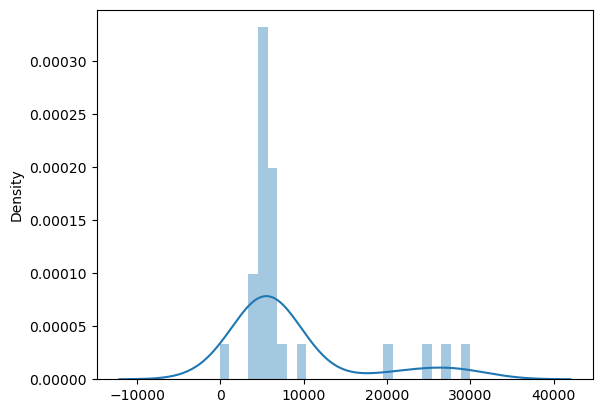

In [33]:
salary_dist = np.random.randint(4000, 7000, size = 20)
salary_dist = np.append(salary_dist, [-99, 30000, 20000, 25000, 10000, 27000])
sns.distplot(salary_dist);

The value **-99** is obviously a missing value indicator, and should be removed as an outlier. The high values would be considered outliers by rules such as Tukey's method, but may be the most informative on the phenomenon that we're investigating. 

### Skewness and kurtosis

Loosely speaking, 
- Skewness describes how skewed the distribution is. 
- Kurtosis describes how fat the tails are.


**Notice that regressing on the data with outliers results in high skew and kurtosis in the residuals.**

#### Skewness Review
>If a skewness value of greater than 1 is obtained in either direction (positive/negative), we say that the distribution is highly skewed. A skewness value of 0 represents a perfectly symmetric distribution, which in the case of real-world data is close to impossible to observe.
#### Kurtosis Review
>1. If the kurtosis is **negative** ($<0$), we say the distribution is **platykurtic**. This means its tails are **thinner** than that of a Normal distribution. Visually, platykurtic distributions appear **shorter** in height compared to a Normal distribution.
>2. If the kurtosis value is **zero** ($=0$), we say the distribution is **mesokurtic**. This means the thickness of its tails are **identical**/**similar** to that of a Normal distribution.
>3. If the kurtosis value is **positive** ($>0$), we say the distribution is **leptokurtic**. This means its tails are **thicker** than that of a Normal distribution. Visually, leptokurtic distributions appear **taller** in height compared to a Normal distribution.

In [34]:
salary_dist

array([ 5680,  4322,  4041,  4255,  4839,  6937,  5504,  6097,  5649,
        6383,  6466,  5587,  6809,  5411,  4711,  5611,  4605,  5803,
        5935,  5382,   -99, 30000, 20000, 25000, 10000, 27000])

In [35]:
# salary_dist is np.array so we need to use skew() and kurtosis() from scipy.stats
from scipy.stats import skew, kurtosis
skew(salary_dist), kurtosis(salary_dist)

(1.8692749918585836, 2.0843411515573402)

In [36]:
mod = lm(formula = "mpg ~ disp", data = mtcars)
mod.params

Intercept    29.599855
disp         -0.041215
dtype: float64

/var/folders/61/m_2xqd155ld3c486ws93hvxc0000gn/T/ipykernel_11796/2210721755.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mod.resid).set_title( 'mpg ~ disp; Residuals Histogram');


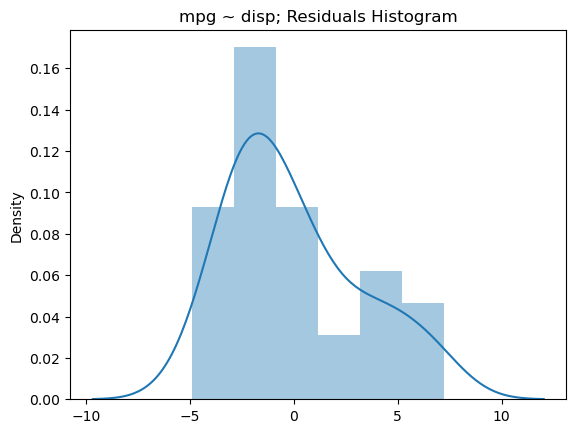

In [37]:
sns.distplot(mod.resid).set_title( 'mpg ~ disp; Residuals Histogram');

In [38]:
# mod.resid is dataframe so we can use skew() and kurt() from pandas
mod.resid.skew(), mod.resid.kurt()

(0.7549010776662964, -0.33649838122642795)

### When does it *not* matter?

As the sample size grows, the normality assumption for the residuals is not needed.

### When *might* it matter? 

Outliers can bias the slope coefficient if they do not reflect the underlying linear process. 

In [39]:
### Residual diagnostics 
### Outliers and influence on slope parameter 

In [40]:
mtcars_outlier = mtcars.loc[:, ["disp", "mpg"]]
mtcars_outlier["outlier"] = False
mtcars_outlier = mtcars_outlier.append(pd.DataFrame({"disp": [400,450,410], 
                                                     "mpg": [35,37,36], 
                                                     "outlier": [True, True, True]}))

mod2 = lm(formula = "mpg ~ disp", data = mtcars_outlier)
mod2.params

/var/folders/61/m_2xqd155ld3c486ws93hvxc0000gn/T/ipykernel_11796/3366904880.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mtcars_outlier = mtcars_outlier.append(pd.DataFrame({"disp": [400,450,410],


Intercept    26.307192
disp         -0.019652
dtype: float64

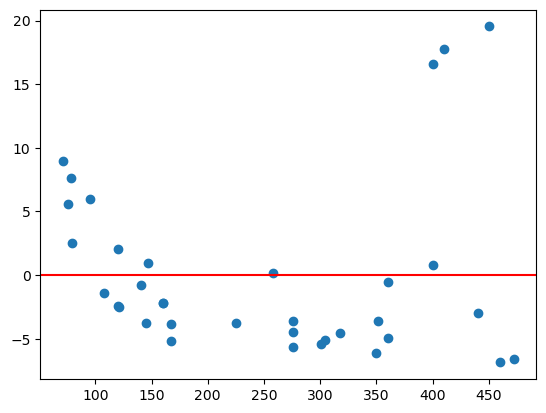

In [41]:
plt.scatter(y=mod2.resid, x=mtcars_outlier.disp)
plt.axhline(np.mean(mod2.resid), color='red');

In [42]:
mod2.resid.skew(), mod2.resid.kurt()

(1.6490947821714663, 2.1635345742977705)

Compare this to regressing without the outlier:

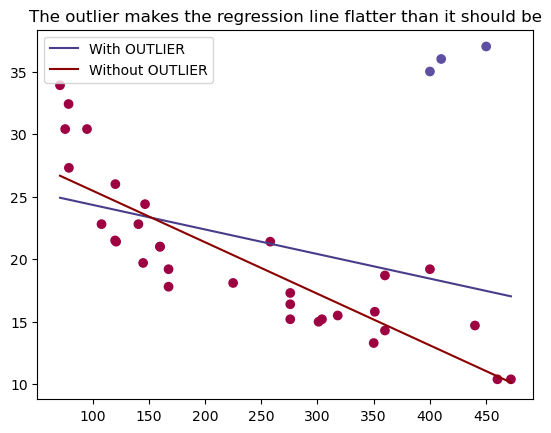

In [43]:
ax = plt.subplot()
fitted_2 = lambda x: mod2.params[0] + mod2.params[1] * x
fitted_1 = lambda x: mod.params[0] + mod.params[1] * x
xmin=np.min(mtcars_outlier.disp)
xmax=np.max(mtcars_outlier.disp)
xval=np.linspace(xmin, xmax, 100)
yhat_2 = fitted_2(xval)
yhat_1 = fitted_1(xval)

plt.scatter(mtcars_outlier.disp, mtcars_outlier.mpg, 
            c = mtcars_outlier.outlier, cmap="Spectral")
plt.plot(xval, yhat_2, "-", c = "darkslateblue", label = 'With OUTLIER')
plt.plot(xval, yhat_1, "-", c = "darkred", label = 'Without OUTLIER')
plt.title("The outlier makes the regression line flatter than it should be")
plt.legend();

#### How to deal with outliers? 
 - Deletion 
 > We remove outliers only if we have good reasons to do that. For example, we know those outliers are wrong numbers have been recorded by mistake, or there is no way that we can fix them. For instance, if age of a patient has been recorded as zero, we are sure this value is wrong and if we do not have any other information about this patient, we cannot fix this wrong number.
> Also, if the outlier is from another population we are studying, we may want to delete that.
> Furthermore, you may want to delete a few weird data points if you already have a good model and it will be much better model if you get rid of those a few weird data points.
 - Change model, e.g. functional form
>Sometimes data points can look like outliers because we are looking at the wrong pattern. For instance, if a quadratic model (e.g. $\hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2$ ) is a better fit for our data, but we insist to use linear model without quadratic terms, some part of our data points which are far from the line estimate may look like outliers. In this case, We need to change our model and add polynomial terms to the linear regression to get a better fit for the data.

## Residual diagnostics

Residuals are differences between the actual value of y and the estimated value $\hat y$.
$$y = \beta _0  + \beta_1 x_1 +  \beta_2 x_2 + ... + \beta_n x_n + \epsilon$$
$$\hat y = \hat \beta _0  + \hat \beta_1 x_1 + \hat \beta_2 x_2 + ... +\hat \beta_n x_n $$
$$residual = e =y - \hat y$$
We can get the list of the residuals from python by `model.resid`.

Under the linear regression assumption: 
> $\varepsilon \sim Normal(0, \sigma)$.
For a good linear regression we need to have $e \sim Normal(0, \hat \sigma)$.

### Residual plots 

#### Plot the Residuals Against the Predictor

Residual plots visualise our estimates of $\epsilon_i$s against each predictor. 
- **What to look out for?** We assumed our residuals were 'random'. Therefore, a good regression should have no pattern in the residuals; specifically:
    - flat scatter about 0
    - variation approximately constant and not change with predictors
        
- If there is a pattern in the residual plot (e.g. curvature), we may be able to fit the data better if we add other predictors or polynomial terms into our linear regression model.
- If the **variation** in the residuals changes with the predictor variable, we may have heteroscedasticity in our residuals perhaps due to getting the functional form of the regression wrong. 

<img src='../images/ResPlot1.png'>

**Example:** Plot residuals against `disp` for linear model `mpg ~ disp` in both `mtcars` and `mtcars_outlier` data sets.

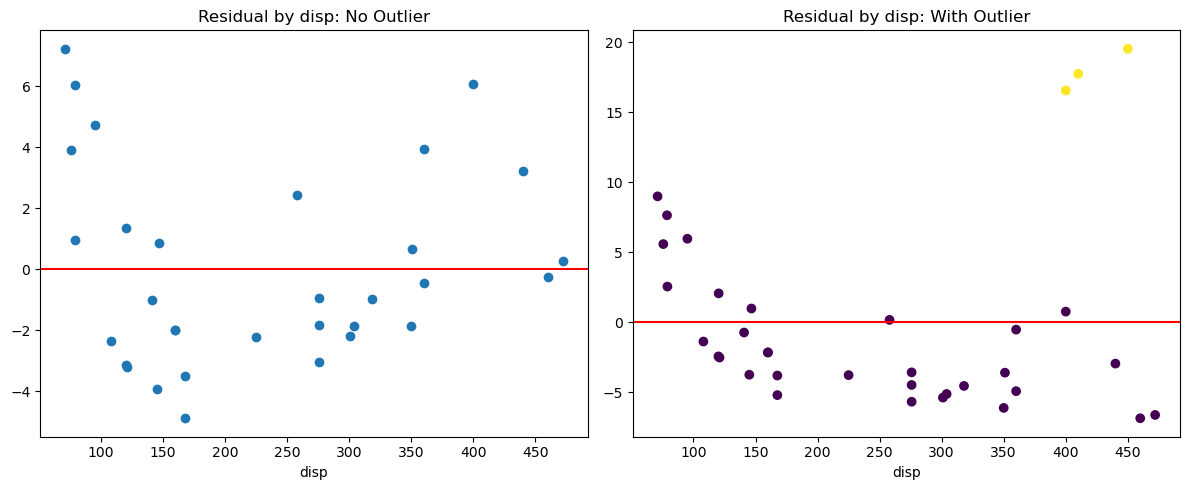

In [44]:
# plt Residual plots mpg ~ disp
fg, ax = plt.subplots(ncols = 2, figsize=(12,5))

ax[0].scatter(x=mtcars.disp, y=mod.resid)
ax[0].axhline(np.mean(mod.resid), color='red')
ax[1].scatter(x=mtcars_outlier.disp, y=mod2.resid, c=mtcars_outlier.outlier)
ax[1].axhline(np.mean(mod2.resid), color='red')


ax[0].set_title("Residual by disp: No Outlier")
ax[0].set_xlabel("disp")
ax[1].set_title("Residual by disp: With Outlier")
ax[1].set_xlabel("disp")

fg.tight_layout()

In [45]:
# Seaborn Residual plots  mpg ~ disp
sns.residplot('disp', mod.resid, data=mtcars)
plt.xlabel("disp")
plt.title('Residual plot');

TypeError: residplot() got multiple values for argument 'data'

**Exercise:** Plot residuals against `room` for linear model `price ~ rooms` in `hprice2` data set. 

In [46]:
hprice2 = pd.read_csv("../data/hprice2.csv")

In [47]:
# Your code here

#### Plot the Residuals Against Another Variable
If the residual plot against another predictor is flat, then this predictor may not improve our model and it is not a good predictor to be added to the linear model we already have. However, if the residual plot against this new predictor shows some patterns we may want to add this new predictor to our current model.

**Example:** Plot residuals of the linear model `mpg ~ disp` against `wt` in `mtcars` data sets. Does adding this predictor to the model results in better performance?

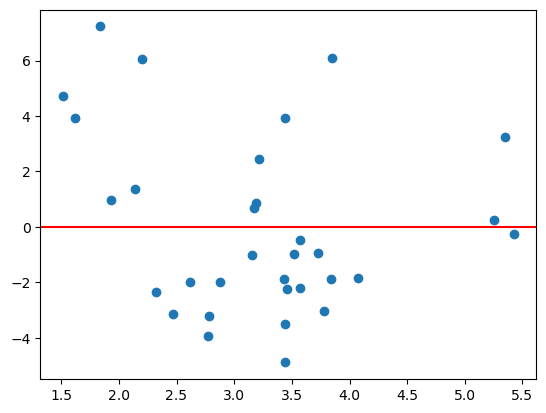

In [48]:
plt.scatter(mtcars.wt, mod.resid)
plt.axhline(np.mean(mod.resid), color='red');

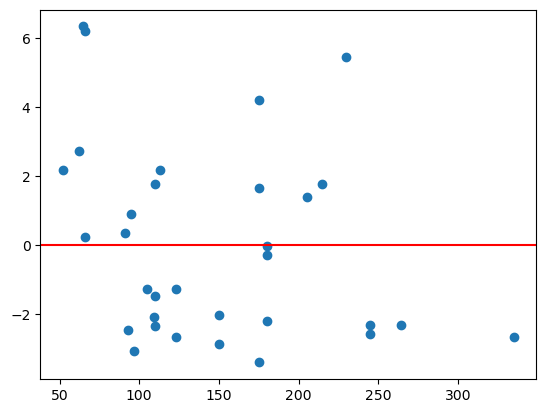

In [49]:
mod3 = lm('mpg ~ disp + wt', mtcars)
plt.scatter(mtcars.hp, mod3.resid)
plt.axhline(np.mean(mod3.resid), color='red');

In [50]:
print('mpg ~ disp : MSE = {}'
      .format(mean_squared_error(mtcars.mpg, mod.predict())))
print('mpg ~ disp : Adjusted R-squared= {}\n'.format(mod.rsquared_adj))
print('mpg ~ disp + wt : MSE = {}'
      .format(mean_squared_error(mtcars.mpg, mod3.predict())))
print('mpg ~ disp + wt : Adjusted R-squared= {}'.format(mod3.rsquared_adj))

mpg ~ disp : MSE = 9.911209040068272
mpg ~ disp : Adjusted R-squared= 0.7089547851727209

mpg ~ disp + wt : MSE = 7.708828199681717
mpg ~ disp + wt : Adjusted R-squared= 0.7658223459116572


**Example:** Plot residuals of the linear model `mpg ~ disp + wt` against `hp` in `mtcars` data sets. Does adding this predictor to the model results in better performance?

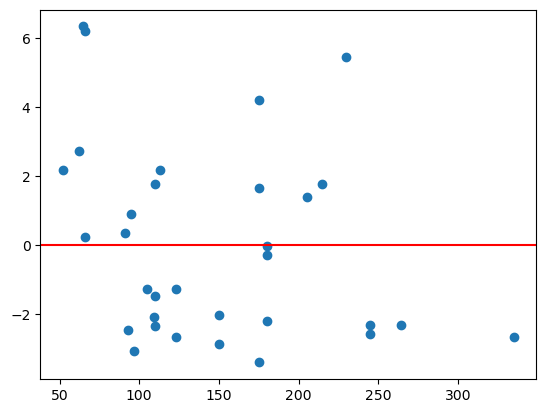

In [51]:
plt.scatter(mtcars.hp, mod3.resid)
plt.axhline(np.mean(mod3.resid), color='red');

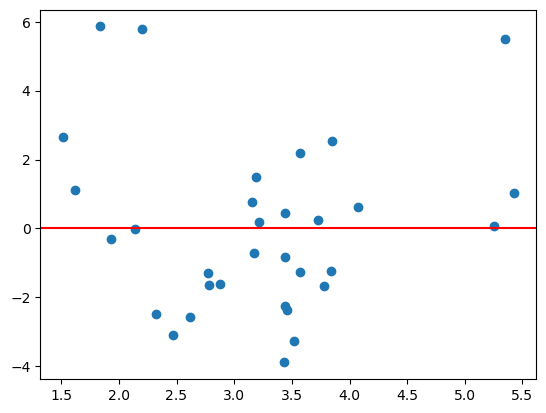

In [52]:
mod4 = lm('mpg ~ disp + wt + hp', mtcars)
plt.scatter(mtcars.wt, mod4.resid)
plt.axhline(np.mean(mod4.resid), color='red');

In [53]:
print('mpg ~ disp : MSE = {}'
      .format(mean_squared_error(mtcars.mpg, mod.predict())))
print('mpg ~ disp : Adjusted R-squared= {}\n'.format(mod.rsquared_adj))

print('mpg ~ disp + wt : MSE = {}'
      .format(mean_squared_error(mtcars.mpg, mod3.predict())))
print('mpg ~ disp + wt : Adjusted R-squared= {}\n'.format(mod3.rsquared_adj))

print('mpg ~ disp + wt + hp : MSE = {}'
      .format(mean_squared_error(mtcars.mpg, mod4.predict())))
print('mpg ~ disp + wt + hp : Adjusted R-squared= {}'.format(mod4.rsquared_adj))

mpg ~ disp : MSE = 9.911209040068272
mpg ~ disp : Adjusted R-squared= 0.7089547851727209

mpg ~ disp + wt : MSE = 7.708828199681717
mpg ~ disp + wt : Adjusted R-squared= 0.7658223459116572

mpg ~ disp + wt + hp : MSE = 6.093458585017381
mpg ~ disp + wt + hp : Adjusted R-squared= 0.8082828720476423


### Plot the Magnitude of the Residuals Against the Predictor

By plotting the squared residuals against the predictor variable we can check whether the variance of the residuals is constant. As the average of the squared residuals is MSE (Mean Squared Error), the scatter plot should normally give us a horizontal and
points around this line, whose height should be around the in-sample MSE.

**If there are Regions of the x axis (predictor) where the residuals are persistently above or below this line, then the problem is associated with the heteroskedasticity in the residuals and there should be a problem with poor linear model possibly due to wrong functional form.**

**Example:** Plot residual squares against `disp` for `mpg ~ disp`, `mpg ~ disp + wt` in `mtcars` data sets. 

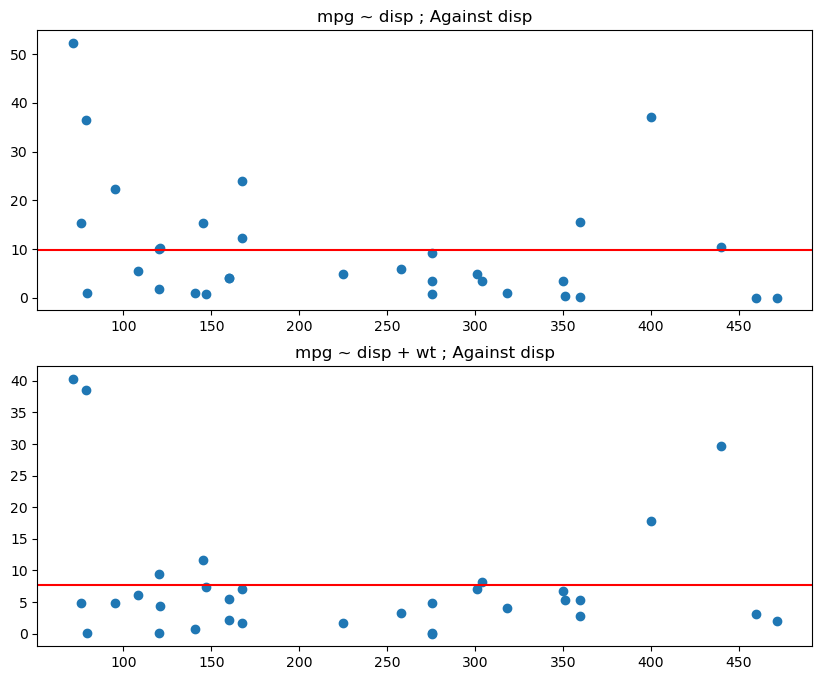

In [54]:
fig, axes = plt.subplots(nrows=2, figsize=(10,8))
axes[0].scatter(mtcars.disp, mod.resid**2)
axes[0].axhline(np.mean(mod.resid**2), color='red')
axes[0].set_title('mpg ~ disp ; Against disp')

axes[1].scatter(mtcars.disp, mod3.resid**2)
axes[1].axhline(np.mean(mod3.resid**2), color='red')
axes[1].set_title('mpg ~ disp + wt ; Against disp');

**Exercise:** Plot residual squares against `crime`, `rooms`, and `lowstat` for `price ~ rooms`, `price ~ rooms + crime` and `price ~ crime + rooms + lowstat` in `hprice2` data sets. 

In [55]:
# Your code here

### Plot the Distribution of the Residuals
The residuals should follow a Normal distribution with mean zero. 

**Example:** Plot the histogram of the residuals for `price ~ rooms + crime + lowstat` in `hprice2` data sets. 

In [56]:
sns.distplot(mod_p3.resid).set_title( 'price ~ rooms + crime + lowstat ;  histogram of residuals');

NameError: name 'mod_p3' is not defined

### QQ plot

Compares the sample quantiles of the residuals against the theoretical quantiles of the normal distribution. 

In [57]:
from statsmodels.graphics.gofplots import qqplot

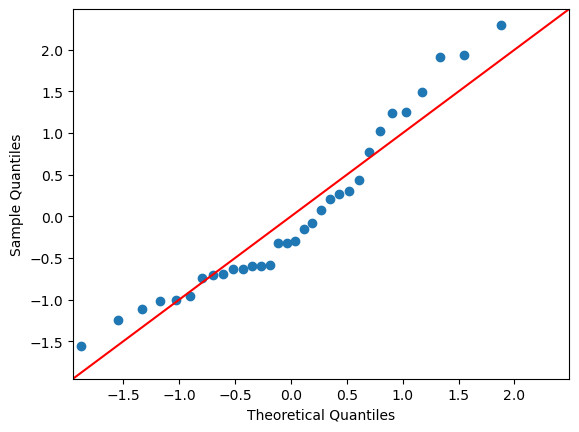

In [58]:
qqplot(mod.resid , fit = True, line = "45");

/var/folders/61/m_2xqd155ld3c486ws93hvxc0000gn/T/ipykernel_11796/1257396533.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mod2.resid, ax = ax[0,1])
/var/folders/61/m_2xqd155ld3c486ws93hvxc0000gn/T/ipykernel_11796/1257396533.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mod.resid, ax 

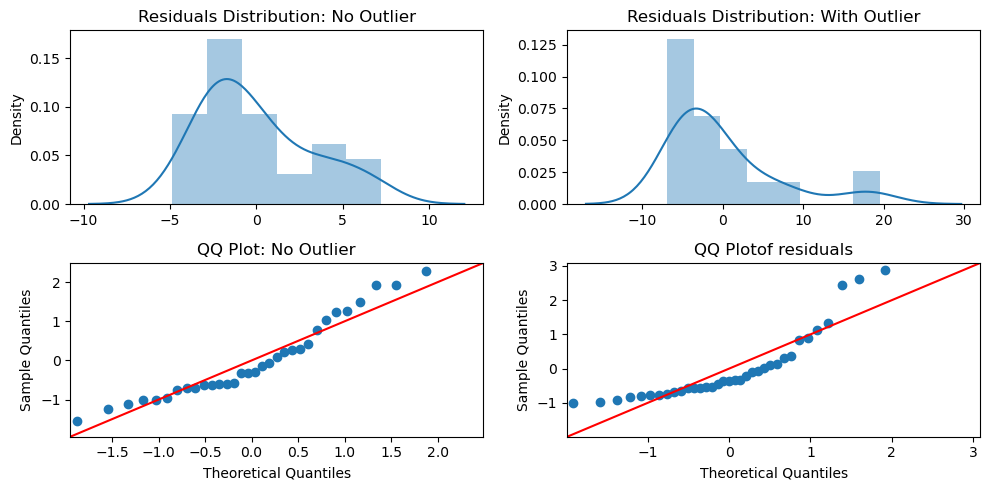

In [59]:
fg, ax = plt.subplots(2, 2, figsize=(10,5))

sns.distplot(mod2.resid, ax = ax[0,1])
sns.distplot(mod.resid, ax = ax[0,0])
qqplot(mod.resid , fit = True, line = "45", ax=ax[1,0])
qqplot(mod2.resid, fit = True, line = "45", ax= ax[1,1])


ax[0,0].set_title("Residuals Distribution: No Outlier")
ax[0,1].set_title("Residuals Distribution: With Outlier")
ax[1,0].set_title("QQ Plot: No Outlier")
ax[1,1].set_title("QQ Plotof residuals");

fg.tight_layout()


## Solution 

1. **Remove outliers**. This may introduce selection bias, so be cautious. Outliers that can be corrected should be corrected, e.g. data recording errors. 
2. **Change the model**. Right-skew in the data is a common issue. In the case of right-skewed predictors, the logarithmic transformation of the predictor will take on a more 'normal' distribution.  

**Example:**

    a- Create a linear regression model that predicts `prestige` based on `education`, `income`, and `women`.
    
    b- Evaluate the model performance using train-test-split approach. Use MSE and R2 as metrics
    
    c- Do Residual diagnostics
    
    d- Improve the model accuracy

Data set `Prestige` includes 6 columns with the following format:

- education: Average education of occupational incumbents, years, in 1971.

- income: Average income, dollars, in 1971.

- women: Percentage of incumbents who are women.

- prestige: Pineo-Porter prestige score for occupation, from a social survey conducted in the mid-1960s.

- census: Canadian Census occupational code.

- type: Type of occupation. A factor with levels (note: out of order): bc, Blue Collar; prof, Professional, Managerial, and Technical; wc, White Collar.

**Source:**

Canada (1971) Census of Canada. Vol. 3, Part 6. Statistics Canada [pp. 19-1–19-21].

In [60]:
# import 
Prestige = pd.read_csv("../data/Prestige.csv")
Prestige.head()

,education,income,women,prestige,census,type
0,13.11,12351,11.16,68.8,1113,prof
1,12.26,25879,4.02,69.1,1130,prof
2,12.77,9271,15.70,63.4,1171,prof
3,11.42,8865,9.11,56.8,1175,prof
4,14.62,8403,11.68,73.5,2111,prof


In [61]:
# train-test split 
train = Prestige.sample(frac = .7, random_state=42)
test = Prestige.drop(train.index)

# fit 
mod = lm(formula = "prestige ~ income + education + women", 
         data = train)
print(mod.params)

Intercept   -4.084385
income       0.001333
education    3.998403
women       -0.020969
dtype: float64


In [62]:
mod_r2=r2_score( test.prestige, mod.predict(test))
mod_mse=mean_squared_error(test.prestige, mod.predict(test))
print('prestige ~ income + education + women; R2 = {:.2f}'.format(mod_r2))
print('prestige ~ income + education + women; MSE = {:.2f}'.format(mod_mse))

prestige ~ income + education + women; R2 = 0.82
prestige ~ income + education + women; MSE = 61.17


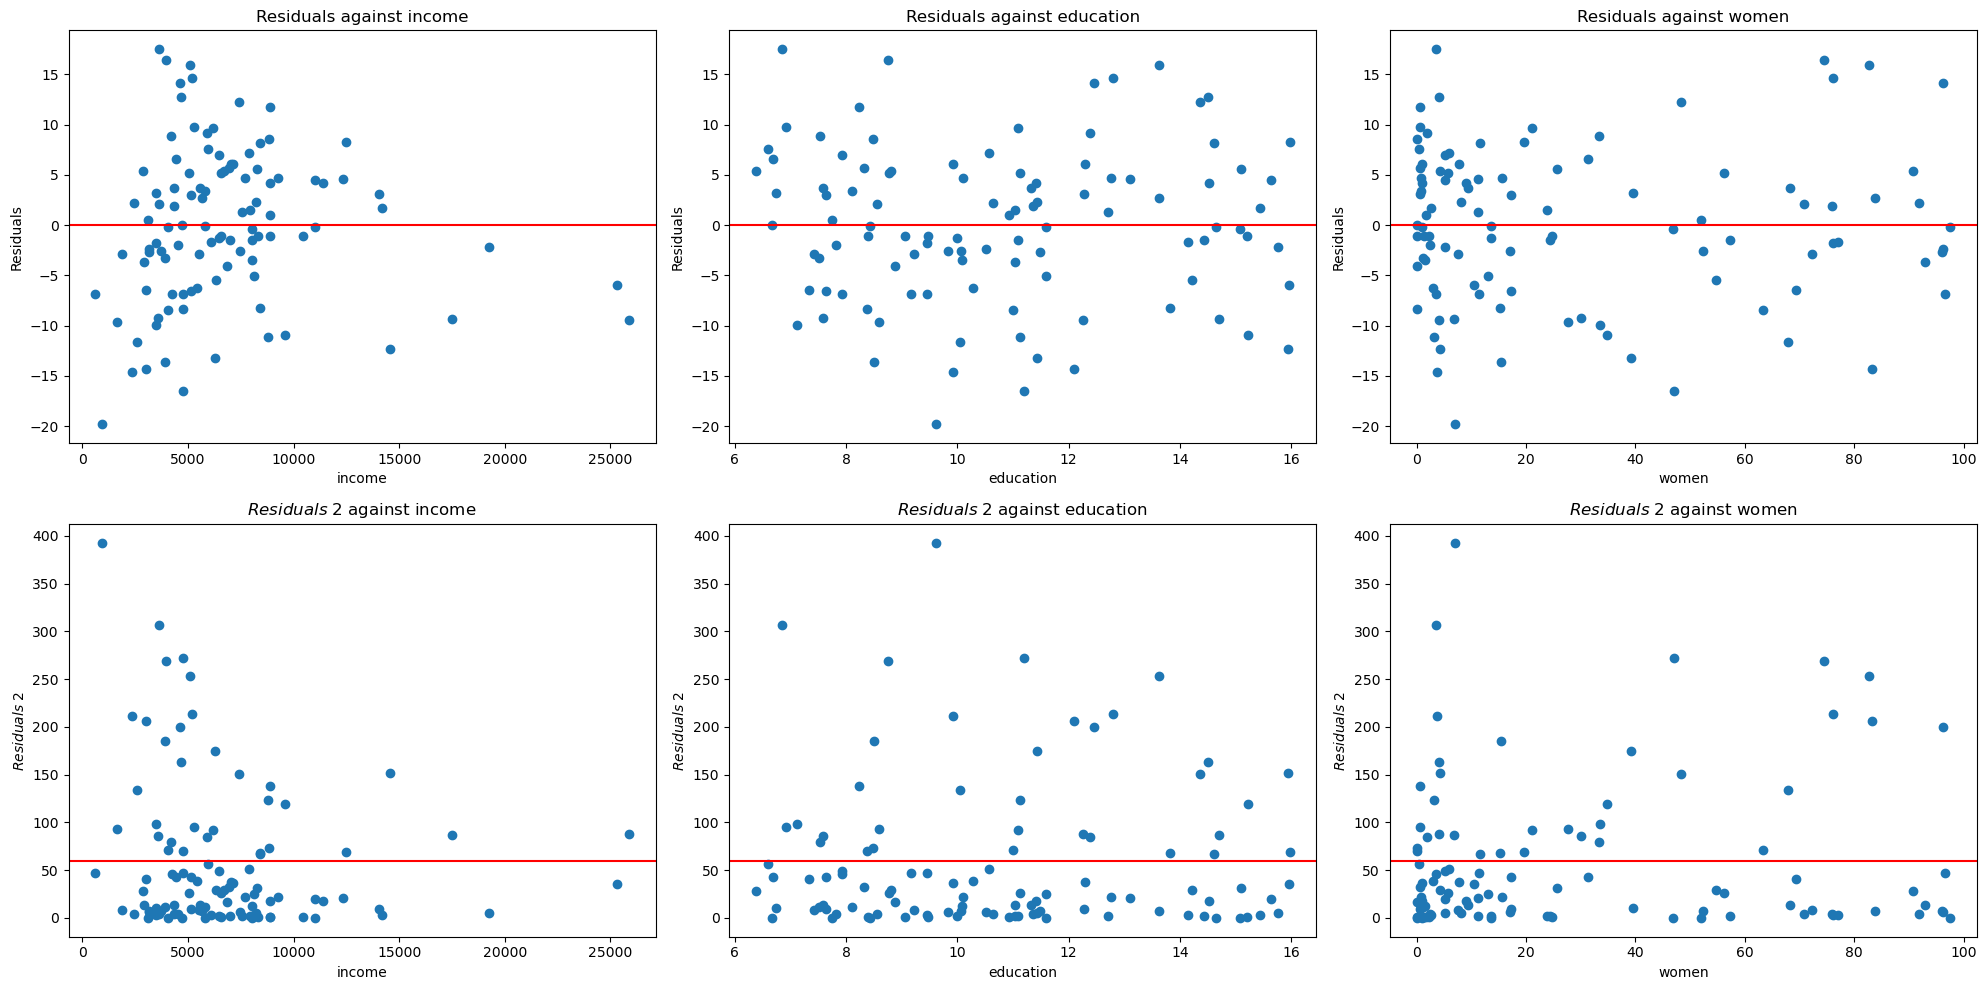

In [63]:
# Residual Diagnostics
fg, ax = plt.subplots(nrows = 2, 
                      ncols = 3, 
                      figsize = (20, 10))
model1 = lm(formula = "prestige ~ income + education + women", 
         data = Prestige)

i = 0
for col in ["income", "education", "women"]: 
    ax[0, i].scatter(Prestige[col], model1.resid)
    ax[0, i].axhline(np.mean(model1.resid), c='red')
    ax[0, i].set_title(f"Residuals against {col}")
    ax[0, i].set_ylabel("Residuals")
    ax[0, i].set_xlabel(col)
    
    ax[1, i].scatter(Prestige[col], model1.resid ** 2)
    ax[1, i].axhline(np.mean(model1.resid**2), c='red')
    ax[1, i].set_title(f"$Residuals ^ 2$ against {col}")
    ax[1, i].set_ylabel("$Residuals ^ 2$ ")
    ax[1, i].set_xlabel(col)
    
    i += 1

fg.tight_layout()
plt.show()

In [64]:
model2 = lm(formula = "prestige ~ np.log(income) + education + women", 
         data = Prestige)
print('prestige ~ income + education + women; Adjusted R-squared= {}'.format(model1.rsquared_adj))
print('prestige ~ income + education + women; AIC = {}'.format(model1.aic))
print('prestige ~ income + education + women; BIC = {}\n'.format(model1.bic))

print('prestige ~ np.log(income) + education + women; Adjusted R-squared= {}'.format(model2.rsquared_adj))
print('prestige ~ np.log(income) + education + women; AIC = {}'.format(model2.aic))
print('prestige ~ np.log(income) + education + women; BIC = {}\n'.format(model2.bic))

prestige ~ income + education + women; Adjusted R-squared= 0.7919992449435435
prestige ~ income + education + women; AIC = 713.6358407916771
prestige ~ income + education + women; BIC = 724.1357320448142

prestige ~ np.log(income) + education + women; Adjusted R-squared= 0.8300475758753787
prestige ~ np.log(income) + education + women; AIC = 693.0294774535507
prestige ~ np.log(income) + education + women; BIC = 703.5293687066878



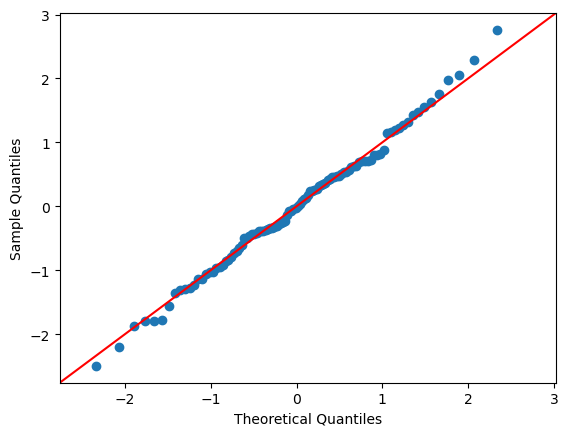

In [65]:
# Q-Q plot 
qqplot(model2.resid, fit = True, line = "45")
plt.show()

In [66]:
# income doesn't seem quite normally distributed - take log 
# fit 
mod2 = lm(formula = "prestige ~ np.log(income) + education + women", 
         data = train)
print(mod2.params)
mod2_r2=r2_score(test.prestige, mod2.predict(test))
mod2_mse=mean_squared_error(test.prestige, mod2.predict(test))
print('prestige ~ np.log(income) + education + women; R2 = {:.2f}'.format(mod2_r2))
print('prestige ~ np.log(income) + education + women; MSE = {:.2f}'.format(mod2_mse))

Intercept        -89.370938
np.log(income)    10.981140
education          3.809297
women              0.014069
dtype: float64
prestige ~ np.log(income) + education + women; R2 = 0.88
prestige ~ np.log(income) + education + women; MSE = 40.19


**Exercise:** In `advertising` data set, design a linear regression model to estimate `sales`.

In [67]:
ad=pd.read_csv('../data/Advertising.csv')
ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [68]:
ad=ad.drop('Unnamed: 0', axis=1)
ad.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


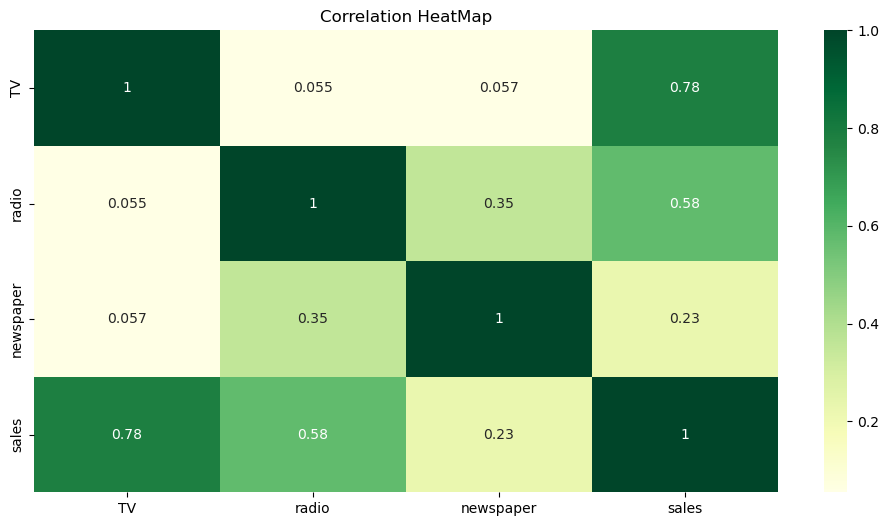

In [69]:
# Heat Map of Correlations
corr_matrix = ad.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, cmap='YlGn', annot=True, square=False)
plt.title('Correlation HeatMap');

In [70]:
# Your code here

In [ ]:
# Q-Q plot 
qqplot(ad_model.resid, fit = True, line = "45")
plt.show()

# Reference

- Linear Regression General: 
http://home.iitk.ac.in/~shalab/econometrics/Chapter2-Econometrics-SimpleLinearRegressionAnalysis.pdf

- Linear Regression General:
https://online.stat.psu.edu/stat501/lesson/6/6.1

- Linear Regression Coefficients Sampling distribution: 
https://www.econometrics-with-r.org/4-5-tsdotoe.html


- Linear Regression Coefficients Sampling distribution: 
https://scholar.princeton.edu/sites/default/files/bstewart/files/lecture5handout.pdf


- Linear Regression Coefficients Sampling distribution: http://www.robots.ox.ac.uk/~fwood/teaching/W4315_Fall2011/Lectures/lecture_4/lecture4.pdf


- Assumptions Of Linear Regression Algorithm: 
https://towardsdatascience.com/assumptions-of-linear-regression-algorithm-ed9ea32224e1


- Residual Diagnosis: http://www.cs.cornell.edu/courses/cs1380/2018sp/textbook/chapters/13/5/visual-diagnostics.html


- Linear Regression & Inference Rules (Video): 
https://www.khanacademy.org/math/ap-statistics/inference-slope-linear-regression/inference-slope/v/intro-inference-slope


- The Complete Guide to Linear Regression in Python: 
https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8


- Model Selection: 
https://machinelearningmastery.com/probabilistic-model-selection-measures/